In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import scipy.misc

In [5]:
def binomial(x, n, p):
    return scipy.misc.comb(n, x) * p**x * (1 - p)**(n - x)

def normal(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def poisson(x, lamb):
    return lamb**x / scipy.misc.factorial(x) * np.exp(-lamb)

#### a)

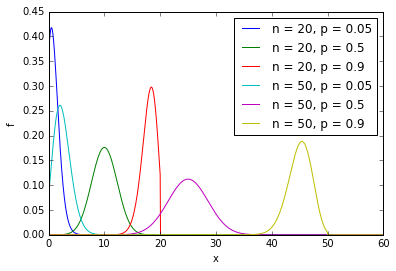

In [30]:
x = np.linspace(0, 60, 1000)
for n in [20, 50]:
    for p in [0.05, 0.5, 0.9]:
        plt.plot(x, binomial(x, n, p), label='n = {}, p = {}'.format(n, p))
        
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
#plt.ylim(0, 0.3)

The binomial distribution is a good model for throwing a coin and observing how often it shows a specific side.

Properties of the binomial:

* discrete
* two possible outcomes per observation
* observations independent
* probabilities are the same for each observation

Therefore, the binomial distribution is not a good model if there are more than two outcomes (e.g. throwing a dice and observing the counts for each side).

#### b) and c)

(0, 60)

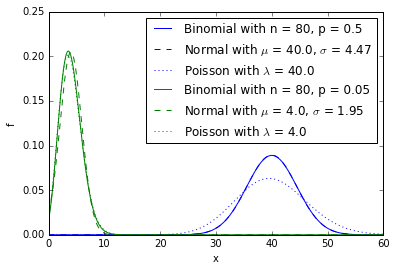

In [27]:
for n, p, col in [[80, 0.5, 'b'], [80, 0.05, 'g']]:
    mean = n * p
    std = np.sqrt(n * p * (1 - p))
    plt.plot(x, binomial(x, n, p), col, label=r'Binomial with n = {}, p = {}'.format(n, p))
    plt.plot(x, normal(x, mean, std), col+'--', label=r'Normal with $\mu$ = {}, $\sigma$ = {:.2f}'.format(mean, std))
    plt.plot(x, poisson(x, mean), col+':', label=r'Poisson with $\lambda$ = {}'.format(mean))

    
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
#plt.ylim(0, 0.3)
plt.xlim(0, 60)

The normal distribution is a good approximation for large n (>= 50) and p ~ 0.5 (see blue curve). Then, $\mu = n p$ and $\sigma^2 = n p (1 - p)$. It is widely used due to the central limit theorem (a random variable with many independent small deviations approximately follows the normal distribution). For the coin experiment, the normal approximation is valid if the coin is unbiased and thrown very often.

The Poisson distribution is a good approximation for large n (>= 50) and small p (<= 0.05) (see green curve). Then, $\lambda = n p$. For the coin experiment, the Poisson approximation is not suited if the coin is not heavily biased.